# Teknisk Tirsdag - Supervised Learning

Tillykke! Du er hermed blevet ansat som Data Scientist for en norsk virksomhed, der arbejder med at rådgive internationale fodboldklubber, i hvilke spillere der kan skal erhverve rundt omkring i Verden. 

Du har fået udleveret et datasæt for fodboldspillere i 2018 og du skal lave nogle analyser...

In [1]:
#PURE PYTHON!!!!
import numpy as np
import pandas as pd

import os
import re

In [2]:
path = %pwd
path += '/fifa-18-demo-player-dataset/CompleteDataset.csv'

### Import og Cleaning af data
Det allerførste som er nødvendigt, er at importere data til Python. Til dette har vi lavet følgende metoder, som henter spillerne ind fra en csv fil. 

In [3]:
def clean_raw_data(path=None):
    """
    Denne metode fjerner uønskede kolonner samt indsætter 0 på målmændendes ikke-målmænd attributter
    @input: path: sti til hvor data ligger
    """
    raw_data = (pd
                .DataFrame
                .from_csv(
                    path=path,
                    encoding='utf-8',
                    index_col='ID'
                ))
    del raw_data['Club Logo']
    del raw_data['Photo']
    del raw_data['Flag']
    del raw_data['Unnamed: 0']
    del raw_data['Special']
    raw_data = convert_object_col_to_float(
        raw_data.fillna(0))
    return raw_data
    

In [4]:
def convert_object_col_to_float(pdf):
    """
    
    """
    
    remove_funny_stuff = lambda x: float(re.sub('\W\d+','',x))
    for col in pdf.columns[9:43]: # Vi snyder, for vi ved godt at fejlene ligger i disse kolonner...
        try:
            if pdf.dtypes[col] == np.object:
                pdf[col] = pdf[col].map(str)
                pdf[col] = pdf[col].map(remove_funny_stuff)
        except Exception as e:
            print(col+" "+str(e))
            break
    return pdf

In [5]:
df = clean_raw_data(path)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2847: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


data_frame_no_pos

In [6]:
df['Value'] = df['Value'].map(lambda x: re.sub('€','',x))
df['Wage'] = df['Wage'].map(lambda x: re.sub('€','',x))


In [7]:
c = df['Value'].map(lambda x: re.findall('(\d+\.?\d)([MK])',x))
s = c[c.index == 20801]
float(s.tolist()[0][0][0])

95.5

In [8]:
desired_clubs = ['Real Madrid CF', 'FC Barcelona', 
                 'FC Bayern Munich', 'Paris Saint-Germain',
                 'Chelsea', 'Manchester City']

In [9]:
def parse_of_wage(val):
    val = re.sub('€', '', val)
    valdict = {'M': 1000000, 'K': 1000, '': 0}
    
    try:
        splitter = re.findall('(\d*\.?\d)([MK]?)', val)[0]
        return float(splitter[0])*valdict[splitter[1]]
    except IndexError as e:
        print(splitter)

In [10]:
df['Value'] = df['Value'].map(lambda x: parse_of_wage(x))
df['Wage'] = df['Wage'].map(lambda x: parse_of_wage(x))


In [11]:
df['label'] = df['Club'].isin(desired_clubs).astype(int)
positions = ["CAM", "CB", "CDM", "CF", 
             "CM", "LAM", "LB", "LCB", 
             "LCM", "LDM", "LF", "LM", 
             "LS", "LW", "LWB" , "RAM", 
             "RB", "RCB", "RCM", "RDM", 
             "RF", "RM", "RS", "RW", 
             "RWB" , "ST"]

data_frame_no_pos= df[[i for i in df.columns if i not in positions]]

In [12]:
data_frame_no_pos

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,label
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,1
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,1
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,1
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,1
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58,29.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,1
188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79,80.0,...,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST,1
193080,De Gea,26,Spain,90,92,Manchester United,64500000.0,215000.0,57,38.0,...,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK,0
183277,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93,54.0,...,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW,1
182521,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,60,60.0,...,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM,1


### Data analyse
Vi vil gerne se hvordan vores spillere "ser" ud.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
corr = data_frame_no_pos.drop('label').corr()

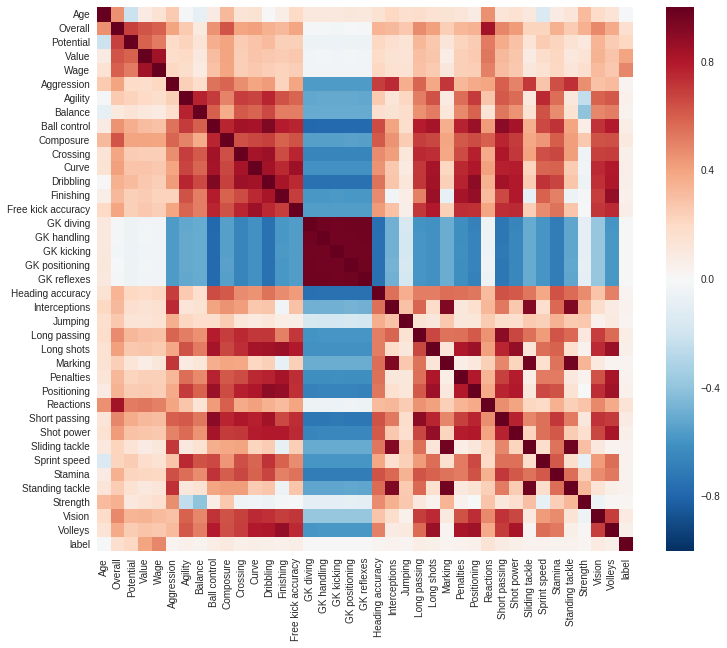

In [21]:
fig = plt.figure(figsize=(12,10))
sb.heatmap(corr)
plt.show()

In [ ]:
sb.boxplot(x='Club',y='Value',data=data_frame_no_pos)
plt.show()

Vi laver et test datasæt med danskere!

In [22]:
test_dansker = data_frame_no_pos[data_frame_no_pos['Nationality'] == 'Denmark'] 
test_dansker

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,label
ID,,,,,,,,,,,,,,,,,,,,,
190460,C. Eriksen,25,Denmark,87,91,Tottenham Hotspur,65000000.0,165000.0,77,44.0,...,80.0,22.0,74.0,90.0,56.0,57.0,90.0,74.0,LM RM CAM,0
163587,K. Schmeichel,30,Denmark,83,84,Leicester City,19000000.0,65000.0,62,33.0,...,36.0,13.0,60.0,35.0,14.0,62.0,59.0,15.0,GK,0
213661,A. Christensen,21,Denmark,81,89,Chelsea,23000000.0,86000.0,70+9,73.0,...,31.0,84.0,73.0,68.0,88.0,70.0,60.0,25.0,CDM CB,1
179645,S. Kjær,28,Denmark,81,82,Sevilla FC,16000000.0,23000.0,60,80.0,...,78.0,80.0,68.0,78.0,82.0,83.0,49.0,37.0,CB,0
172522,D. Wass,28,Denmark,80,80,RC Celta de Vigo,14500000.0,33000.0,73,59.0,...,86.0,68.0,76.0,90.0,67.0,68.0,80.0,69.0,CAM CM,0
202849,J. Vestergaard,24,Denmark,79,84,Borussia Mönchengladbach,14500000.0,36000.0,47,81.0,...,81.0,77.0,46.0,63.0,82.0,94.0,50.0,39.0,CB,0
199852,N. Jørgensen,26,Denmark,79,81,Feyenoord,15500000.0,25000.0,76,60.0,...,80.0,24.0,78.0,84.0,36.0,81.0,76.0,74.0,ST,0
159240,M. Krohn-Dehli,34,Denmark,79,79,Sevilla FC,6500000.0,24000.0,69,67.0,...,81.0,61.0,66.0,67.0,73.0,66.0,86.0,53.0,CM LM,0
228687,K. Dolberg,19,Denmark,78,88,Ajax,16500000.0,10000.0,73,44.0,...,87.0,19.0,79.0,71.0,24.0,77.0,69.0,75.0,CAM ST,0


In [23]:
df_train = data_frame_no_pos.loc[data_frame_no_pos['Nationality'] != 'Denmark']

In [24]:
df_train

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,label
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,1
158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,1
190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,1
176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,1
167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58,29.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,1
188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79,80.0,...,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST,1
193080,De Gea,26,Spain,90,92,Manchester United,64500000.0,215000.0,57,38.0,...,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK,0
183277,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93,54.0,...,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW,1
182521,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,60,60.0,...,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM,1


In [25]:
assert len(data_frame_no_pos) - len(test_dansker) == len(df_train) , 'We didn\'t get all the danes'

In [26]:
X_train = pd.concat([
    df_train.loc[df_train['label']==0].sample(170),
    df_train.loc[df_train['label']==1]
]).select_dtypes(include=['float64', 'int'])

In [27]:
y_train = X_train['label']
del X_train['label']

In [28]:
X_train

,Age,Overall,Potential,Value,Wage,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
ID,,,,,,,,,,,,,,,,,,,,,
203362,22,78,84,14000000.0,36000.0,49.0,86.0,83.0,78.0,71.0,...,72.0,82.0,76.0,44.0,82.0,82.0,31.0,61.0,73.0,74.0
216269,26,66,69,650000.0,2000.0,62.0,70.0,73.0,65.0,56.0,...,64.0,64.0,52.0,64.0,74.0,67.0,66.0,67.0,48.0,45.0
226268,19,63,77,700000.0,2000.0,62.0,51.0,71.0,59.0,59.0,...,59.0,56.0,33.0,66.0,67.0,67.0,66.0,58.0,45.0,33.0
228708,21,70,83,3100000.0,10000.0,67.0,67.0,63.0,66.0,53.0,...,71.0,68.0,63.0,69.0,69.0,68.0,67.0,72.0,59.0,49.0
179811,29,70,70,1300000.0,11000.0,64.0,78.0,74.0,64.0,72.0,...,68.0,66.0,62.0,67.0,72.0,78.0,69.0,64.0,66.0,61.0
148564,32,69,69,825000.0,6000.0,86.0,73.0,80.0,71.0,63.0,...,68.0,70.0,70.0,39.0,72.0,64.0,43.0,59.0,68.0,65.0
202201,25,77,79,9000000.0,25000.0,73.0,66.0,63.0,64.0,72.0,...,74.0,67.0,72.0,74.0,76.0,72.0,81.0,77.0,71.0,49.0
230400,29,70,70,1400000.0,19000.0,72.0,32.0,29.0,49.0,65.0,...,71.0,48.0,58.0,64.0,78.0,61.0,74.0,77.0,39.0,37.0
227379,17,53,75,130000.0,1000.0,28.0,90.0,82.0,49.0,37.0,...,40.0,43.0,49.0,23.0,78.0,78.0,24.0,58.0,42.0,46.0


# Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
classifier = LogisticRegression(random_state=0)


In [31]:
model = classifier.fit(X_train, y_train)

In [32]:
model.score(X_train, y_train)

0.55588235294117649

In [33]:
del test_dansker['label']

In [34]:
dansker = model.predict(test_dansker.select_dtypes(include=['float64', 'int']))

In [35]:
test_dansker.loc[:,'f'] = pd.Series(dansker, index=test_dansker.index)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
test_dansker[['Name', 'f']].sort('f',ascending=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Name,f
ID,,
190460,C. Eriksen,1
152036,T. Christensen,1
212045,C. Højer,1
229436,S. Gartenmann,1
219957,J. Barrett Laursen,1
239156,M. Fossum Basse,1
239150,M. Bruhn,1
205091,N. Gotfredsen,1
204301,M. Rochester Sørensen,1


In [37]:
test_dansker.count()

Name                   346
Age                    346
Nationality            346
Overall                346
Potential              346
Club                   346
Value                  346
Wage                   346
Acceleration           346
Aggression             346
Agility                346
Balance                346
Ball control           346
Composure              346
Crossing               346
Curve                  346
Dribbling              346
Finishing              346
Free kick accuracy     346
GK diving              346
GK handling            346
GK kicking             346
GK positioning         346
GK reflexes            346
Heading accuracy       346
Interceptions          346
Jumping                346
Long passing           346
Long shots             346
Marking                346
Penalties              346
Positioning            346
Reactions              346
Short passing          346
Shot power             346
Sliding tackle         346
Sprint speed           346
S